# Learning MLPipelines using spark

Example for writing functions that handles errors. We use this function to
convert each element of the row to double.

In [2]:
def typeConvert(value):
    try:
        return float(value)
    except ValueError,TypeError:
        return (value.strip())


In [3]:
path = '/Users/vishnu/Documents/datasets/myexperiments/adult/adult.data'
rawData = (sc.textFile(path)
           .map(lambda x : x.split(","))
           .map(lambda l : map(lambda element: typeConvert(element),l))
            )
    
rawData.first()

[39.0,
 u'State-gov',
 77516.0,
 u'Bachelors',
 13.0,
 u'Never-married',
 u'Adm-clerical',
 u'Not-in-family',
 u'White',
 u'Male',
 2174.0,
 0.0,
 40.0,
 u'United-States',
 u'<=50K']

In [4]:
newRawData = (sc.textFile(path)
           .map(lambda x : x.split(","))
           .map(lambda x : len(x))
           .distinct()
           .collect()
             )

In [5]:
print newRawData

[1, 15]


In [6]:
newRawData = (sc.textFile(path)
           .map(lambda x : x.split(","))
           .filter(lambda x : len(x)==1)
            .take(10) )
print newRawData

[[u'']]


In [7]:
rawData = (sc.textFile(path)
           .map(lambda x : x.split(","))
           .filter(lambda x : len(x)==15)
           .map(lambda l : map(lambda element: typeConvert(element),l))
            )

In [8]:
rawData.first()

[39.0,
 u'State-gov',
 77516.0,
 u'Bachelors',
 13.0,
 u'Never-married',
 u'Adm-clerical',
 u'Not-in-family',
 u'White',
 u'Male',
 2174.0,
 0.0,
 40.0,
 u'United-States',
 u'<=50K']

# Creating Dataframe

In [9]:
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType ,DoubleType ,FloatType

In [10]:
schema = StructType([
    StructField("age",FloatType(),True),
    StructField("workclass",StringType(),True),
    StructField("fnlwgt",DoubleType(),True),
    StructField("education",StringType(),True),
    StructField("unknown",StringType(),True),  
    StructField("marital_status",StringType(),True),
    StructField("occupation",StringType(),True),
    StructField("relationship",StringType(),True),
    StructField("race",StringType(),True),
    StructField("sex",StringType(),True),
    StructField("capital_gain",DoubleType(),True),
    StructField("capital_loss",DoubleType(),True),
    StructField("hours_per_week",DoubleType(),True),
    StructField("native_country",StringType(),True),
    StructField("income",StringType(),True)
])

In [11]:
 # Create a DataFrame by applying the schema to the RDD and print the schema

In [12]:
rawdf = sqlContext.createDataFrame(rawData, schema)

In [13]:
rawdf.printSchema()

root
 |-- age: float (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- education: string (nullable = true)
 |-- unknown: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [14]:
rawdf = rawdf.drop('unknown')

In [15]:
#rawdf.groupBy("workclass").count().show()
rawdf.groupBy("workclass").count().show()


+----------------+-----+
|       workclass|count|
+----------------+-----+
|         Private|22696|
|     Federal-gov|  960|
|       State-gov| 1298|
|               ?| 1836|
|       Local-gov| 2093|
|    Self-emp-inc| 1116|
|     Without-pay|   14|
|    Never-worked|    7|
|Self-emp-not-inc| 2541|
+----------------+-----+



In [21]:
workclass = rawdf.groupBy("workclass").count().map(lambda x:(x[0],x[1])).takeOrdered(10,lambda x:-x[1])
print workclass


[(u'Private', 22696), (u'Self-emp-not-inc', 2541), (u'Local-gov', 2093), (u'?', 1836), (u'State-gov', 1298), (u'Self-emp-inc', 1116), (u'Federal-gov', 960), (u'Without-pay', 14), (u'Never-worked', 7)]


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(data):
    values = map(lambda x: x[1],data)
    labels = map(lambda x: x[0],data)
    plt.barh(range(len(values)),values,color='blue')
    plt.yticks(range(len(values)),labels)
    plt.show()

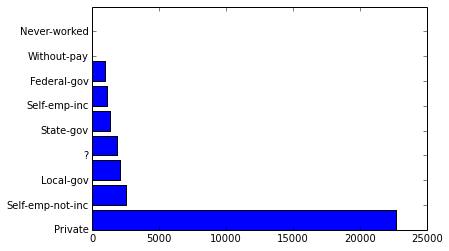

In [29]:
plot(workclass)

In [30]:
from pyspark.sql.functions import *
rawdf.groupBy("native_country").count().orderBy("count", ascending=False).show()

+------------------+-----+
|    native_country|count|
+------------------+-----+
|     United-States|29170|
|            Mexico|  643|
|                 ?|  583|
|       Philippines|  198|
|           Germany|  137|
|            Canada|  121|
|       Puerto-Rico|  114|
|       El-Salvador|  106|
|             India|  100|
|              Cuba|   95|
|           England|   90|
|           Jamaica|   81|
|             South|   80|
|             China|   75|
|             Italy|   73|
|Dominican-Republic|   70|
|           Vietnam|   67|
|         Guatemala|   64|
|             Japan|   62|
|            Poland|   60|
+------------------+-----+
only showing top 20 rows



In [31]:
rawdf.groupBy("occupation").count().show(truncate=False)

+-----------------+-----+
|occupation       |count|
+-----------------+-----+
|Other-service    |3295 |
|Prof-specialty   |4140 |
|Farming-fishing  |994  |
|?                |1843 |
|Protective-serv  |649  |
|Adm-clerical     |3770 |
|Machine-op-inspct|2002 |
|Transport-moving |1597 |
|Sales            |3650 |
|Priv-house-serv  |149  |
|Handlers-cleaners|1370 |
|Craft-repair     |4099 |
|Exec-managerial  |4066 |
|Tech-support     |928  |
|Armed-Forces     |9    |
+-----------------+-----+



In [32]:
rawdf = rawdf.na.replace(['?'],['Private'],'workclass')
rawdf = rawdf.na.replace(['?'],['Private'],'native_country')


In [33]:
rawdf.groupBy("workclass").count().show()

+----------------+-----+
|       workclass|count|
+----------------+-----+
|         Private|24532|
|     Federal-gov|  960|
|       State-gov| 1298|
|       Local-gov| 2093|
|    Self-emp-inc| 1116|
|     Without-pay|   14|
|    Never-worked|    7|
|Self-emp-not-inc| 2541|
+----------------+-----+



In [34]:
rawdf.groupBy("native_country").count().orderBy("count",ascending=False).show()

+------------------+-----+
|    native_country|count|
+------------------+-----+
|     United-States|29170|
|            Mexico|  643|
|           Private|  583|
|       Philippines|  198|
|           Germany|  137|
|            Canada|  121|
|       Puerto-Rico|  114|
|       El-Salvador|  106|
|             India|  100|
|              Cuba|   95|
|           England|   90|
|           Jamaica|   81|
|             South|   80|
|             China|   75|
|             Italy|   73|
|Dominican-Republic|   70|
|           Vietnam|   67|
|         Guatemala|   64|
|             Japan|   62|
|            Poland|   60|
+------------------+-----+
only showing top 20 rows



In [35]:
from pyspark.ml.feature import *

In [36]:
from pyspark.ml.feature import *
def indexStringColumns(df,cols):
    tempdf = df
    for col in cols:
        stringIndexer = StringIndexer(inputCol=col,outputCol=col+"-num")
        si_model = stringIndexer.fit(tempdf)
        tempdf = si_model.transform(tempdf).drop(col)
        tempdf = tempdf.withColumnRenamed(col+"-num",col)
    return tempdf

In [38]:
cols = {"workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income"}
dfnumeric = indexStringColumns(rawdf,cols)
print cols

set(['native_country', 'relationship', 'marital_status', 'sex', 'race', 'income', 'workclass', 'education', 'occupation'])


In [39]:
(rawdf.select("workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income")
      .show())

+----------------+------------+--------------------+-----------------+-------------+------------------+------+--------------+------+
|       workclass|   education|      marital_status|       occupation| relationship|              race|   sex|native_country|income|
+----------------+------------+--------------------+-----------------+-------------+------------------+------+--------------+------+
|       State-gov|   Bachelors|       Never-married|     Adm-clerical|Not-in-family|             White|  Male| United-States| <=50K|
|Self-emp-not-inc|   Bachelors|  Married-civ-spouse|  Exec-managerial|      Husband|             White|  Male| United-States| <=50K|
|         Private|     HS-grad|            Divorced|Handlers-cleaners|Not-in-family|             White|  Male| United-States| <=50K|
|         Private|        11th|  Married-civ-spouse|Handlers-cleaners|      Husband|             Black|  Male| United-States| <=50K|
|         Private|   Bachelors|  Married-civ-spouse|   Prof-specialty

In [40]:
(dfnumeric.select("workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income")
      .show())

+---------+---------+--------------+----------+------------+----+---+--------------+------+
|workclass|education|marital_status|occupation|relationship|race|sex|native_country|income|
+---------+---------+--------------+----------+------------+----+---+--------------+------+
|      3.0|      2.0|           1.0|       3.0|         1.0| 0.0|0.0|           0.0|   0.0|
|      1.0|      2.0|           0.0|       2.0|         0.0| 0.0|0.0|           0.0|   0.0|
|      0.0|      0.0|           2.0|       9.0|         1.0| 0.0|0.0|           0.0|   0.0|
|      0.0|      5.0|           0.0|       9.0|         0.0| 1.0|0.0|           0.0|   0.0|
|      0.0|      2.0|           0.0|       0.0|         4.0| 1.0|1.0|           9.0|   0.0|
|      0.0|      3.0|           0.0|       2.0|         4.0| 0.0|1.0|           0.0|   0.0|
|      0.0|     10.0|           5.0|       5.0|         1.0| 1.0|1.0|          11.0|   0.0|
|      1.0|      0.0|           0.0|       2.0|         0.0| 0.0|0.0|           

In [41]:
def oneHotEncodeColumns(df,cols):
    tempdf = df
    for col in cols:
        onehotenc = OneHotEncoder(inputCol=col,outputCol=col+"-onehot")
        tempdf = onehotenc.transform(tempdf).drop(col)
        tempdf = tempdf.withColumnRenamed(col+"-onehot",col)
    return tempdf

In [42]:
dfhot = oneHotEncodeColumns(dfnumeric,{"workclass", "education", "marital_status", "occupation", "relationship", "race", "native_country"})
dfhot.printSchema()

root
 |-- age: float (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- income: double (nullable = true)
 |-- native_country: vector (nullable = true)
 |-- relationship: vector (nullable = true)
 |-- marital_status: vector (nullable = true)
 |-- race: vector (nullable = true)
 |-- workclass: vector (nullable = true)
 |-- education: vector (nullable = true)
 |-- occupation: vector (nullable = true)



In [43]:
dfhot.select("workclass", "education", "marital_status", "occupation", "relationship", "race", "native_country").show()

+-------------+---------------+--------------+---------------+-------------+-------------+---------------+
|    workclass|      education|marital_status|     occupation| relationship|         race| native_country|
+-------------+---------------+--------------+---------------+-------------+-------------+---------------+
|(7,[3],[1.0])| (15,[2],[1.0])| (6,[1],[1.0])| (14,[3],[1.0])|(5,[1],[1.0])|(4,[0],[1.0])| (41,[0],[1.0])|
|(7,[1],[1.0])| (15,[2],[1.0])| (6,[0],[1.0])| (14,[2],[1.0])|(5,[0],[1.0])|(4,[0],[1.0])| (41,[0],[1.0])|
|(7,[0],[1.0])| (15,[0],[1.0])| (6,[2],[1.0])| (14,[9],[1.0])|(5,[1],[1.0])|(4,[0],[1.0])| (41,[0],[1.0])|
|(7,[0],[1.0])| (15,[5],[1.0])| (6,[0],[1.0])| (14,[9],[1.0])|(5,[0],[1.0])|(4,[1],[1.0])| (41,[0],[1.0])|
|(7,[0],[1.0])| (15,[2],[1.0])| (6,[0],[1.0])| (14,[0],[1.0])|(5,[4],[1.0])|(4,[1],[1.0])| (41,[9],[1.0])|
|(7,[0],[1.0])| (15,[3],[1.0])| (6,[0],[1.0])| (14,[2],[1.0])|(5,[4],[1.0])|(4,[0],[1.0])| (41,[0],[1.0])|
|(7,[0],[1.0])|(15,[10],[1.0])| (6,[5

In [44]:
dfhot.printSchema()


root
 |-- age: float (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- income: double (nullable = true)
 |-- native_country: vector (nullable = true)
 |-- relationship: vector (nullable = true)
 |-- marital_status: vector (nullable = true)
 |-- race: vector (nullable = true)
 |-- workclass: vector (nullable = true)
 |-- education: vector (nullable = true)
 |-- occupation: vector (nullable = true)



colList = dfhot.columns
colList.remove('income')

In [50]:
vecAssembler = VectorAssembler(inputCols=colList,outputCol="features")
lpointsDF = vecAssembler.transform(dfhot).select("features", "income").withColumnRenamed("income", "label")

In [51]:
lpointsLocal = lpointsDF.groupBy('label').count().map(lambda x: (x[0],x[1])).take(2)

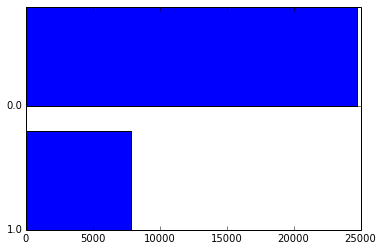

In [52]:
plot(lpointsLocal)

### Splitting the data into train and test data.

In [55]:
(trainingData, testData) = lpointsDF.randomSplit([0.7, 0.3])

### Building a Random tree classifier.

In [56]:
lpointsDF.cache()
from pyspark.ml.classification import RandomForestClassifier
from pyspark.mllib.tree import RandomForest, RandomForestModel
rf = RandomForestClassifier(labelCol="label",featuresCol='features')
#rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")
model = rf.fit(trainingData)
predictions = model.transform(testData)

In [75]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest

from pyspark.mllib.regression import LabeledPoint

(trainingDataRDD, testDataRDD) = (lpointsDF
                            .map(lambda x: LabeledPoint(x[1],x[0]))
                            .randomSplit([0.7, 0.3]))
mllibModel = RandomForest.trainClassifier(trainingDataRDD, numClasses=2, categoricalFeaturesInfo={},
                                     numTrees=3, featureSubsetStrategy="auto",
                                     impurity='gini', maxDepth=4, maxBins=32)
print mllibModel.toDebugString()

TreeEnsembleModel classifier with 3 trees

  Tree 0:
    If (feature 53 <= 0.0)
     If (feature 49 <= 0.0)
      If (feature 3 <= 1741.0)
       If (feature 47 <= 0.0)
        Predict: 0.0
       Else (feature 47 > 0.0)
        Predict: 0.0
      Else (feature 3 > 1741.0)
       If (feature 47 <= 0.0)
        Predict: 1.0
       Else (feature 47 > 0.0)
        Predict: 1.0
     Else (feature 49 > 0.0)
      If (feature 58 <= 0.0)
       Predict: 0.0
      Else (feature 58 > 0.0)
       If (feature 56 <= 0.0)
        Predict: 0.0
       Else (feature 56 > 0.0)
        Predict: 0.0
    Else (feature 53 > 0.0)
     If (feature 81 <= 0.0)
      If (feature 4 <= 44.0)
       If (feature 78 <= 0.0)
        Predict: 0.0
       Else (feature 78 > 0.0)
        Predict: 0.0
      Else (feature 4 > 44.0)
       If (feature 2 <= 7443.0)
        Predict: 0.0
       Else (feature 2 > 7443.0)
        Predict: 1.0
     Else (feature 81 > 0.0)
      If (feature 49 <= 0.0)
       If (feature 2 <= 0.0)


In [57]:
predictions.select("prediction", "label", "features").show(5)

+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|  1.0|(98,[0,1,2,4,5,6,...|
|       1.0|  1.0|(98,[0,1,2,4,6,47...|
|       1.0|  1.0|(98,[0,1,4,6,47,5...|
|       0.0|  1.0|(98,[0,1,4,14,47,...|
|       0.0|  0.0|(98,[0,1,3,4,6,47...|
+----------+-----+--------------------+
only showing top 5 rows



In [62]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
        labelCol="label", predictionCol="prediction", metricName="precision")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.184753


In [81]:
print(model)

RandomForestClassificationModel (uid=rfc_be9d4f681b92) with 10 trees


In [83]:
print model.explainParams()